<a href="https://colab.research.google.com/github/ALK26/Projects/blob/master/Drinking_Habits_of_Global_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Drinking Habits of Global Population
# New York is a global city with over 846 spoken languages. 
# A new wine and brewery establishment wants to analyze the drinking habits of the population by nationality to help determine their inventory. 
# As a Data Scientist, lead this project, and analyze the data of alcohol consumption around the world to better serve the company’s diverse customer base.
# In this assignment, analyze and predict alcohol consumption by country using attributes or features such as beer servings and wine servings.
# Analyze the data and predict the total liters served given the servings. 

# Description - This Dataset is from the story Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? 
# The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. 

# need the following libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Importing the Data - Load the csv:

df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

# use the method head() to display the first 5 columns of the dataframe:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [2]:
# Display the data types of each column using the attribute dtype.
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [3]:
# use the method groupby to get the number of wine servings per continent:

df_group_one = df[['wine_servings','continent']]
df_group_one = df_group_one.groupby(['continent'],as_index=False).sum()
df_group_one


,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


In [4]:
#  Perform a statistical summary and analysis of beer servings for each continent:
df_group_beer = df[['beer_servings','continent']]
df_group_beer = df_group_beer.groupby(['continent'],as_index=False).sum()
df_group_beer

,continent,beer_servings
0,Africa,3258
1,Asia,1630
2,Europe,8720
3,North America,3345
4,Oceania,1435
5,South America,2101


In [5]:
df_group_beer.describe()

,beer_servings
count,6.000000
mean,3414.833333
std,2720.507116
min,1435.000000
25%,1747.750000
50%,2679.500000
75%,3323.250000
max,8720.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


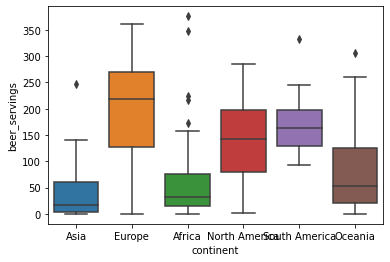

In [6]:
# Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.
import seaborn as sns
# Look at the relationship between "continent" and "beer_servings".
sns.boxplot(x="continent", y="beer_servings", data=df)


(0.0, 409.80025213095)

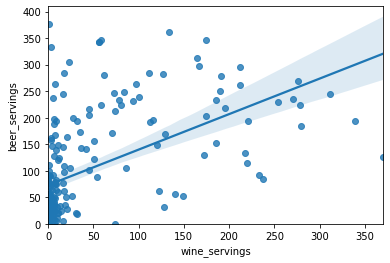

In [7]:
# Use the function  regplot in the seaborn library to determine if the number of wine servings is negatively or positively correlated with the number of beer servings.
sns.regplot(x="wine_servings", y="beer_servings", data=df)
plt.ylim(0,)


In [8]:
# As the wine_servings goes up, the beer_servings goes up: this indicates a positive direct correlation between these two variables. 
df[["wine_servings", "beer_servings"]].corr()

# Examining the correlation between 'wine_servings' and 'beer_servings' and see it's approximately 0.527172

,wine_servings,beer_servings
wine_servings,1.000000,0.527172
beer_servings,0.527172,1.000000


In [9]:
 # Fit a linear regression model to predict the 'total_litres_of_pure_alcohol' using the number of 'wine_servings' then calculate  𝑅2 :
from sklearn.linear_model import LinearRegression

# create the linear regression object
lm = LinearRegression()
lm

X = df[['wine_servings']]
Y = df['total_litres_of_pure_alcohol']

#Fit the linear model using highway-mpg.

lm.fit(X,Y)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# We can output a prediction

Yhat=lm.predict(X)
Yhat[0:5]   

array([ 3.15407943,  4.86088833,  3.59658545, 13.01564196,  4.57642018])

In [11]:
# The value of the intercept (a)
lm.intercept_

3.1540794346874996

In [12]:
# The value of the Slope (b)
lm.coef_

array([0.03160757])

In [13]:
# The final estimated linear model

# 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
 
# Plugging in the actual values we get:

# total_litres_of_pure_alcohol = 3.1540794346874996 + 0.03160757 x wine_servings

In [14]:
# Calculate the R^2
lm.fit(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))


The R-square is:  0.4456875459787605


In [15]:
# Use the list of features to predict the 'total_litres_of_pure_alcohol', # split the data into training and testing and determine the  𝑅2  on the test data
from sklearn.linear_model import LinearRegression

# Training and Testing - 

# will place the target "total_litres_of_pure_alcohol" in a separate dataframe y:
y_data = df['total_litres_of_pure_alcohol']

#drop total_litres_of_pure_alcohol data in x data
x_data=df.drop('total_litres_of_pure_alcohol',axis=1)

In [16]:
# Now randomly split data into training and testing data using the function train_test_split.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

# The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 20% of the total dataset.

number of test samples : 49
number of training samples: 144


In [17]:
# Create a Linear Regression object:

lre=LinearRegression()

# fit the model using the feature beer_servings

lre.fit(x_train[['beer_servings']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Calculate the R^2 on the test data:

lre.score(x_test[['beer_servings']], y_test)

0.6174330250475396

In [19]:
# fit the model using the feature wine_servings
lre.fit(x_train[['wine_servings']], y_train)

# Calculate the R^2 on the test data:
lre.score(x_test[['wine_servings']], y_test)

0.44717492952477533

In [20]:
# fit the model using the feature spirit_servings
lre.fit(x_train[['spirit_servings']], y_train)

# Calculate the R^2 on the test data:
lre.score(x_test[['spirit_servings']], y_test)

0.3209918861633758

In [21]:
# Create a pipeline object that
# 1- scales the data, 
# 2 -performs a polynomial transform and 
# 3- fits a linear regression model. 

# Fit the object using the training data above, then calculate the R^2 using. the test data. 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
 
# create the pipeline, creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

# input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [22]:
# normalize the data, perform a transform and fit the model simultaneously.
Z = df[['beer_servings', 'spirit_servings', 'wine_servings']]
pipe.fit(Z,Y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [23]:
# Similarly, normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:2]

array([0.66771682, 5.02238617])

In [24]:
# Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,Y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [25]:
ypipe=pipe.predict(Z)
ypipe[0:10]

array([ 0.72244985,  5.26936613,  1.40409598, 12.34732018,  6.30123153,
        5.30102433,  8.18102261,  4.06777542, 10.0128061 , 10.05282301])

In [26]:
# Multiple Linear Regression

#calculate the R^2

# fit the model 
lm.fit(Z, df['total_litres_of_pure_alcohol'])

# Find the R^2
print('The R-square is: ', lm.score(Z, df['total_litres_of_pure_alcohol']))

The R-square is:  0.8741728224192638


In [27]:
# Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the  𝑅2  using the test data. 

# import Ridge from the module linear models.
from sklearn.linear_model import Ridge
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['beer_servings', 'wine_servings', 'spirit_servings']])
x_test_pr=pr.fit_transform(x_test[['beer_servings', 'wine_servings', 'spirit_servings']])

# create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test) 

0.7353124976048616

In [28]:
# Perform a 2nd order polynomial transform on both the training data and testing data. 
# Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the  𝑅2  utilizing the test data provided. 

# To perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

# create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [29]:
Z_pr=pr.fit_transform(Z)

In [30]:
Z.shape

(193, 3)

In [31]:
# import Ridge from the module linear models.
from sklearn.linear_model import Ridge
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['beer_servings', 'wine_servings', 'spirit_servings']])
x_test_pr=pr.fit_transform(x_test[['beer_servings', 'wine_servings', 'spirit_servings']])

# create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test) 

0.7353124976048616

In [32]:
# Libraries for plotting

%%capture
! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

# Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
 
    plt.title(Title)
    plt.xlabel('X')
    plt.ylabel('Y')
 
    plt.show()
    plt.close()



In [33]:
# Functions for plotting
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Y')
    plt.legend()

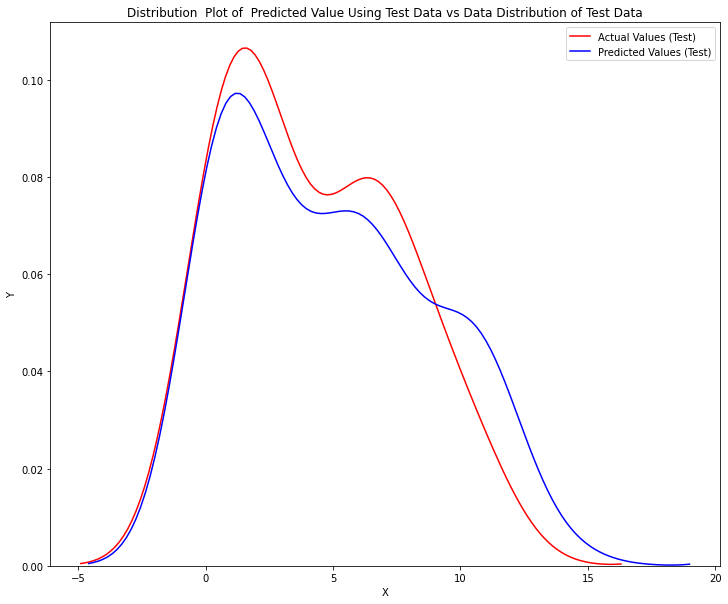

In [34]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_train,"Actual Values (Test)","Predicted Values (Test)",Title)